<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

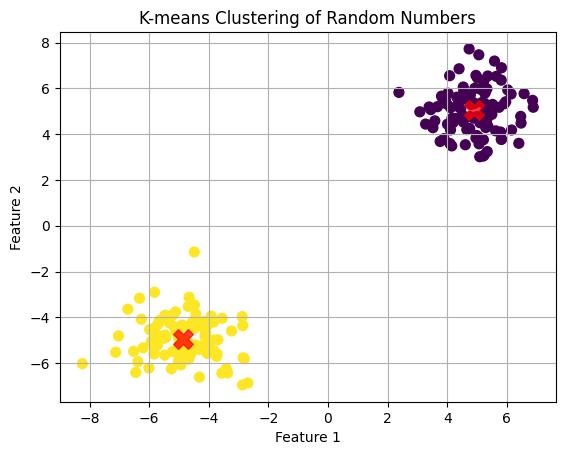

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Установка начального значения генератора случайных чисел для воспроизводимости
np.random.seed(42)

# Генерация данных
# Кластер 1
cluster_1 = np.random.randn(100, 2) + np.array([5, 5])  # Центр в (5, 5)
# Кластер 2
cluster_2 = np.random.randn(100, 2) + np.array([-5, -5])  # Центр в (-5, -5)

# Объединяем кластеры
X = np.vstack((cluster_1, cluster_2))

# Применение K-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering of Random Numbers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

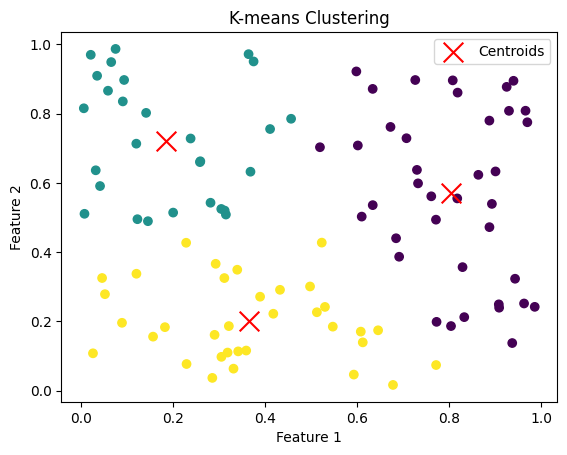

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
data = np.random.rand(100, 2)

# Функция для вычисления расстояния
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Функция K-means
def k_means(data, k, max_iterations=100):
    # Инициализация центров кластеров случайным образом
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Присвоение каждой точки ближайшему центру кластера
        labels = np.array([np.argmin([euclidean_distance(data_point, centroid) for centroid in centroids]) for data_point in data])

        # Обновление центров кластеров
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Параметры
k = 3

# Запуск K-means
centroids, labels = k_means(data, k)

# Визуализация результатов
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()